**Exercise 6.31**. Simulate a nonstationary time series with $n = 60$ according to the model ARIMA(0,1,1) with $\theta = 0.8$. 

**(a)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$, this is the Dickey-Fuller test and is not augmented.) Comment on the results. 

**(b)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results. 

**(c)** Repeat parts (a) and (b) but use the differences of the simulated series. Comment on the results. (Here, of course, you should reject the unit root hypothesis.) 

**Solution**.

The conclusions for this exercise are more intuitive if we instead use $\theta = -0.8$.  We will solve with the original value of $\theta = 0.8$, obtain insatisfactory conclusions, and then repeat the exercise with $\theta = -0.8$.

In [1]:
set.seed(0)
Y = arima.sim(model=list(ma=-0.8, order=c(0, 1, 1)), n=60)

Observe the series is not obviously nonstationary by visual inspection:

In [2]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



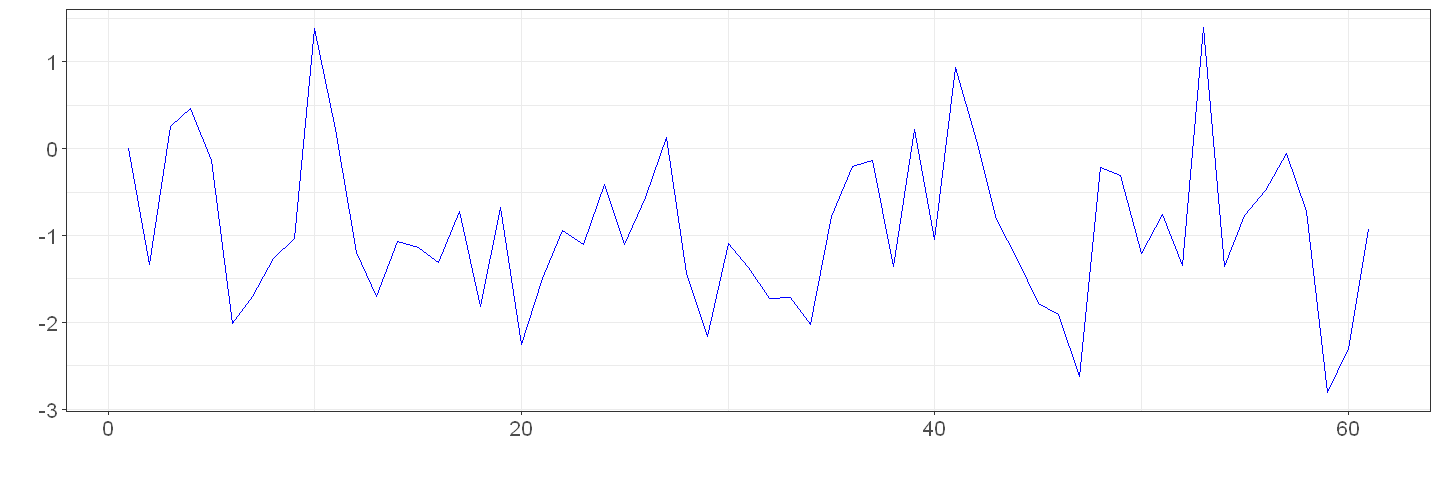

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

**(a)**

In [4]:
require(tseries)

Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [5]:
adf.test(Y, k=0, alternative="stationary")

Warning message in adf.test(Y, k = 0, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -6.0808, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


The Dick-Fuller test does reject nonstationarity (unit root). This disagrees with the series being nonstationary.

**(b)**

In [6]:
adf.test(Y)

Warning message in adf.test(Y):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -4.21, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


The Augmented Dick-Fuller test still rejects nonstationarity.

**(c)**

In [7]:
adf.test(diff(Y), k=0)

Warning message in adf.test(diff(Y), k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -10.883, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [8]:
adf.test(diff(Y))

Warning message in adf.test(diff(Y)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -6.3878, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


Both the Dick-Fuller nor the Augmented Dick-Fuller tests reject nonstationarity on the time series difference (now in agreement with the model.)

Now, repeating the exercise with $\theta = -0.8$:

In [9]:
set.seed(0)
Y = arima.sim(model=list(ma=0.8, order=c(0, 1, 1)), n=60)

The series is more obviously non-stationary, visually:

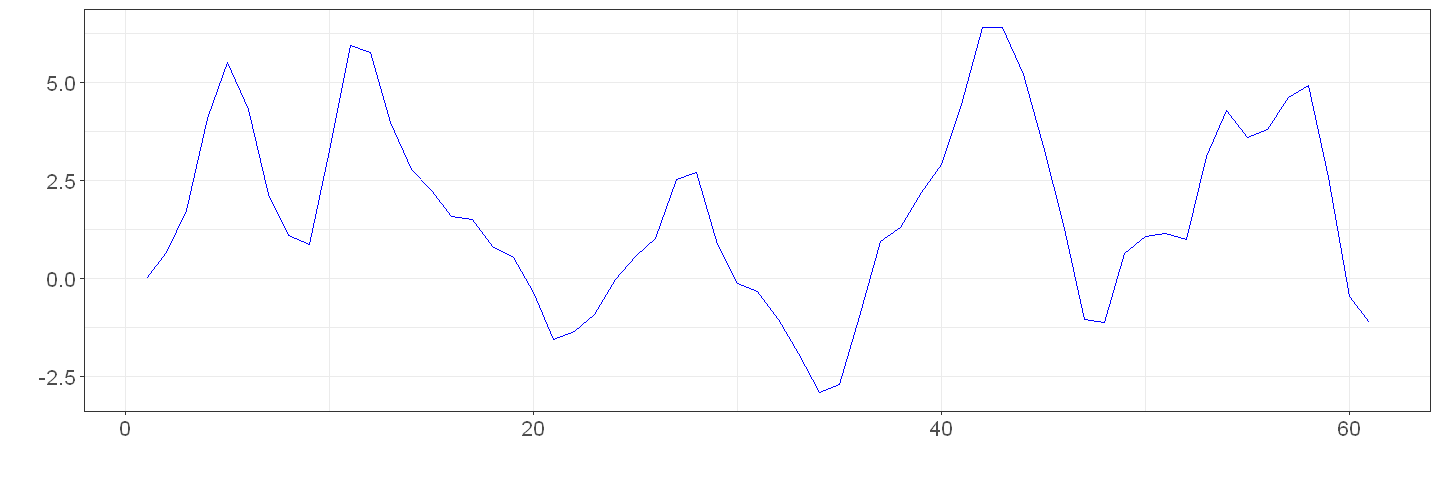

In [10]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

In [11]:
adf.test(Y, k=0)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -2.0941, Lag order = 0, p-value = 0.5368
alternative hypothesis: stationary


Now the Dick-Fuller test correctly does not reject stationarity (p-value over 0.05).

In [12]:
adf.test(Y)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -3.3391, Lag order = 3, p-value = 0.07387
alternative hypothesis: stationary


Augmented Dick-Fuller also does not reject non-stationarity (p-value still over 0.05, though only slightly).

In [13]:
adf.test(diff(Y), k=0)


	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -4.0458, Lag order = 0, p-value = 0.01369
alternative hypothesis: stationary


In [14]:
adf.test(diff(Y))

Warning message in adf.test(diff(Y)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -4.1844, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


For the series of differences, both the Dick-Fuller and the Augmented Dick-Fuller tests reject nonstationarity (correctly).

**Exercise 6.32**. Simulate a stationary time series of length $n = 36$ according to an AR(1) model with $\phi = 0.95$. This model is stationary, but just barely so. With such a series and a short history, it will be difficult if not impossible to distinguish between stationary and nonstationary with a unit root.

**(a)** Plot the series and calculate the sample ACF and PACF and describe what you see.

**(b)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$ this is the Dickey-Fuller test and is not augmented.) Comment on the results.

**(c)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results.

**(d)** Repeat parts (a), (b), and (c) but with a new simulation with $n = 100$.

**Solution**.

In [15]:
set.seed(0)
Y = arima.sim(model=list(ar=0.95), n=36)

**(a)**

In [16]:
# Function to plot provided autocorrelations
plot_acf <- function(acf, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

plot_acf_with_bounds <- function(acf, lower, upper, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() + geom_ribbon(aes(x=k, ymin=lower, ymax=upper), fill='blue', alpha=0.1) +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

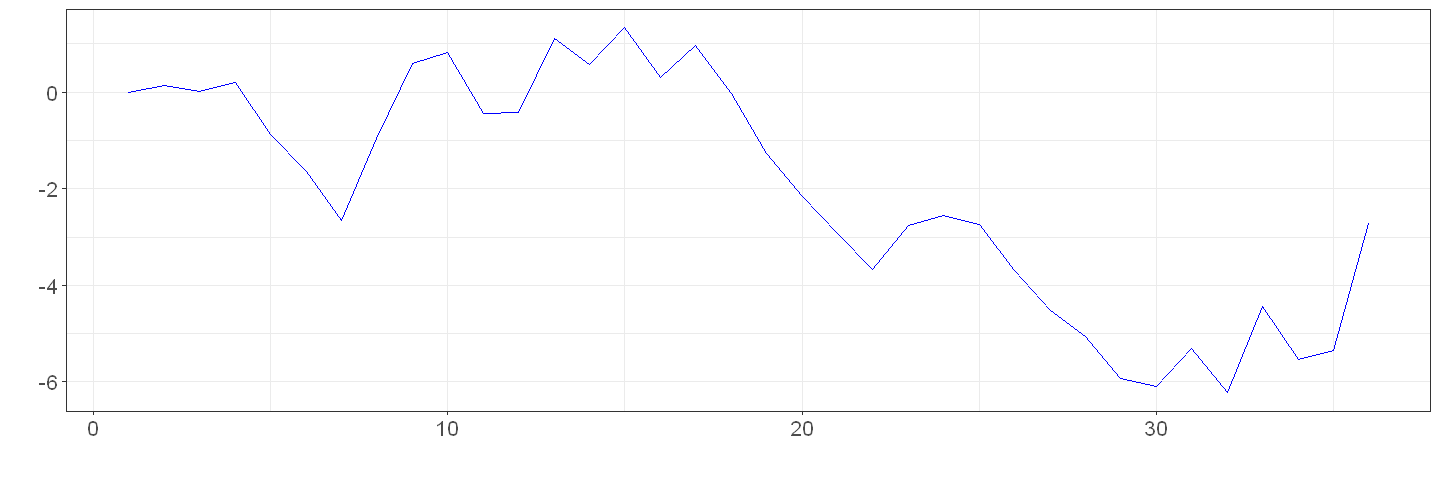

In [17]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

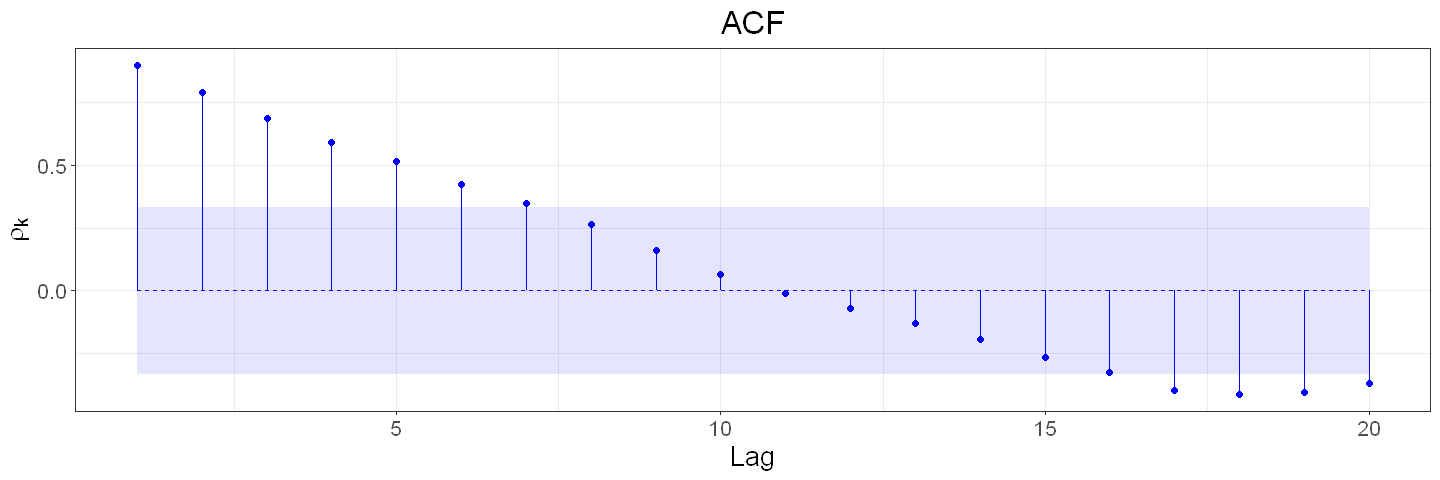

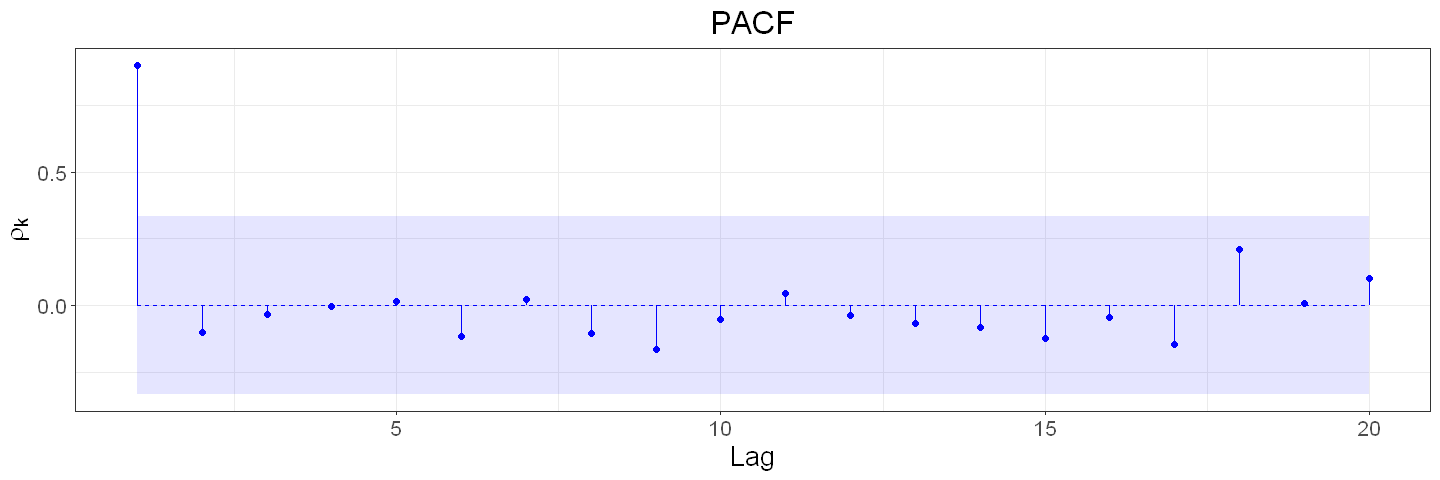

In [18]:
bound = 2 / sqrt(length(Y))
plot_acf_with_bounds(acf(Y, lag.max=20, plot=F)$acf[-1], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, lag.max=20, plot=F)$acf, bound, -bound, title='PACF')

The PACF suggests an AR(1) model, but the series is not obviously stationary from the timeseries.

**(b)**

In [19]:
adf.test(Y, k=0)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -1.8258, Lag order = 0, p-value = 0.6409
alternative hypothesis: stationary


The Dick-Fuller test fails to reject nonstationarity.

**(c)**

In [20]:
adf.test(Y)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -1.6356, Lag order = 3, p-value = 0.7149
alternative hypothesis: stationary


The Augmented Dick-Fuller test fails to reject nonstationarity.

**(d)**

In [21]:
set.seed(0)
Y = arima.sim(model=list(ar=0.95), n=100)

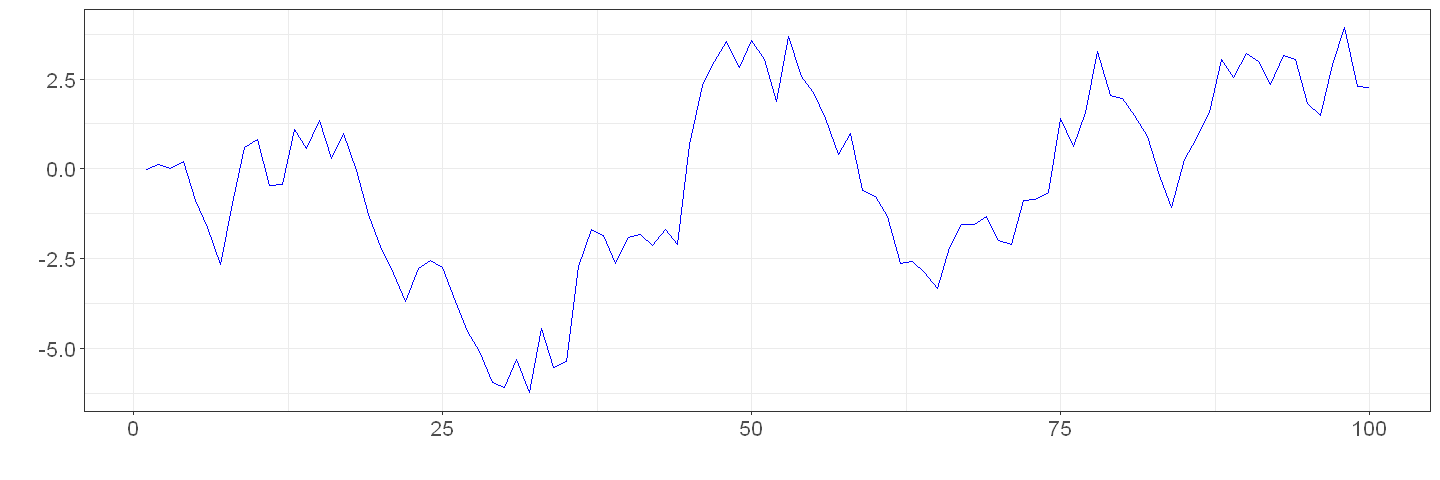

In [22]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

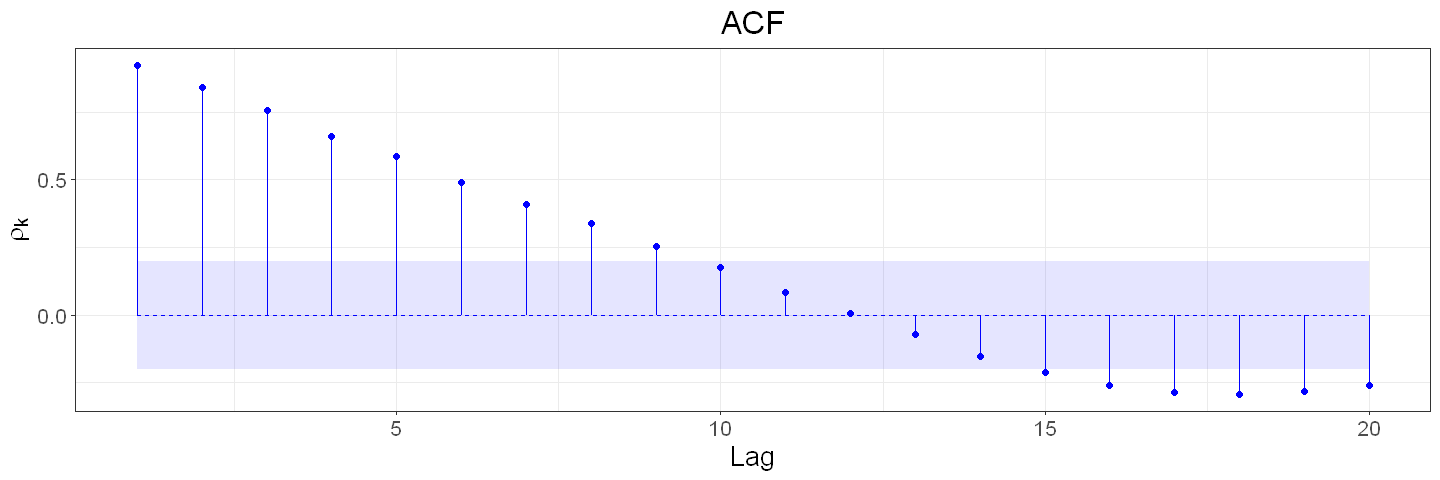

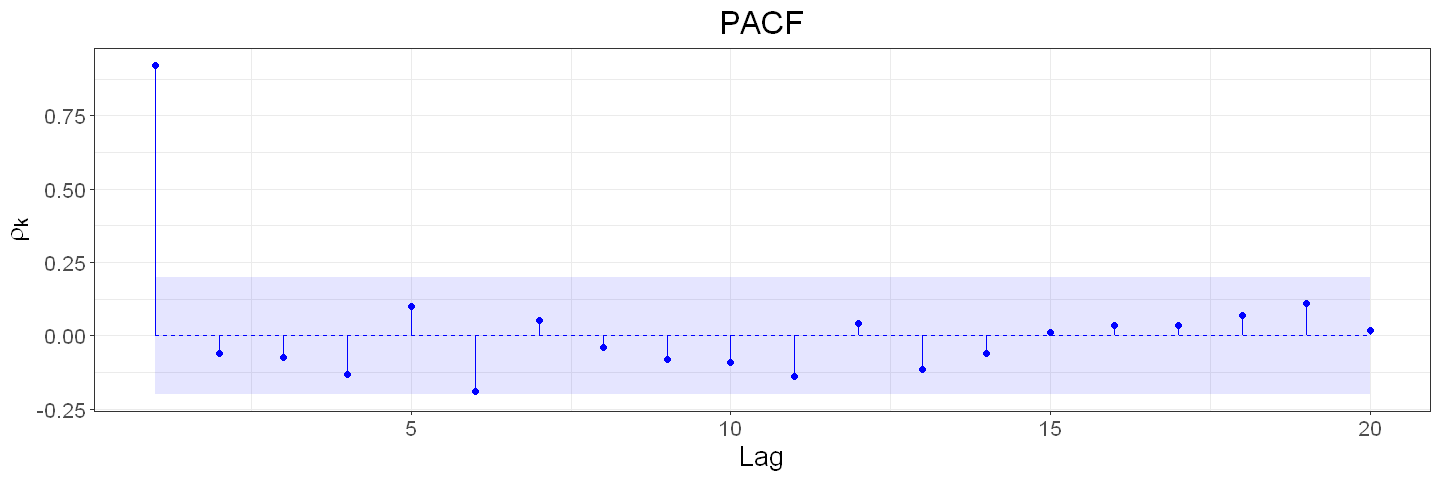

In [23]:
bound = 2 / sqrt(length(Y))
plot_acf_with_bounds(acf(Y, lag.max=20, plot=F)$acf[-1], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, lag.max=20, plot=F)$acf, bound, -bound, title='PACF')

In [24]:
adf.test(Y, k=0)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -2.2681, Lag order = 0, p-value = 0.4656
alternative hypothesis: stationary


In [25]:
adf.test(Y)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -2.3702, Lag order = 4, p-value = 0.4233
alternative hypothesis: stationary


Results look similar.

**Exercise 6.33**. The data file named `deere1` contains 82 consecutive values for the amount of deviation (in 0.000025 inch units) from a specified target value that an industrial machining process at Deere & Co. produced under certain specified operating conditions.

**(a)** Display the time series plot of this series and comment on any unusual points.

**(b)** Calculate the sample ACF for this series and comment on the results.

**(c)** Now replace the unusual value by a much more typical value and recalculate the sample ACF. Comment on the change from what you saw in part (b).

**(d)** Calculate the sample PACF based on the revised series that you used in part (c). What model would you specify for the revised series? (Later we will investigate other ways to handle outliers in time series modeling.)

**Solution**

**(a)**

In [26]:
Y <- read.table("../data/deere1.dat", header=TRUE)[['deere1']]

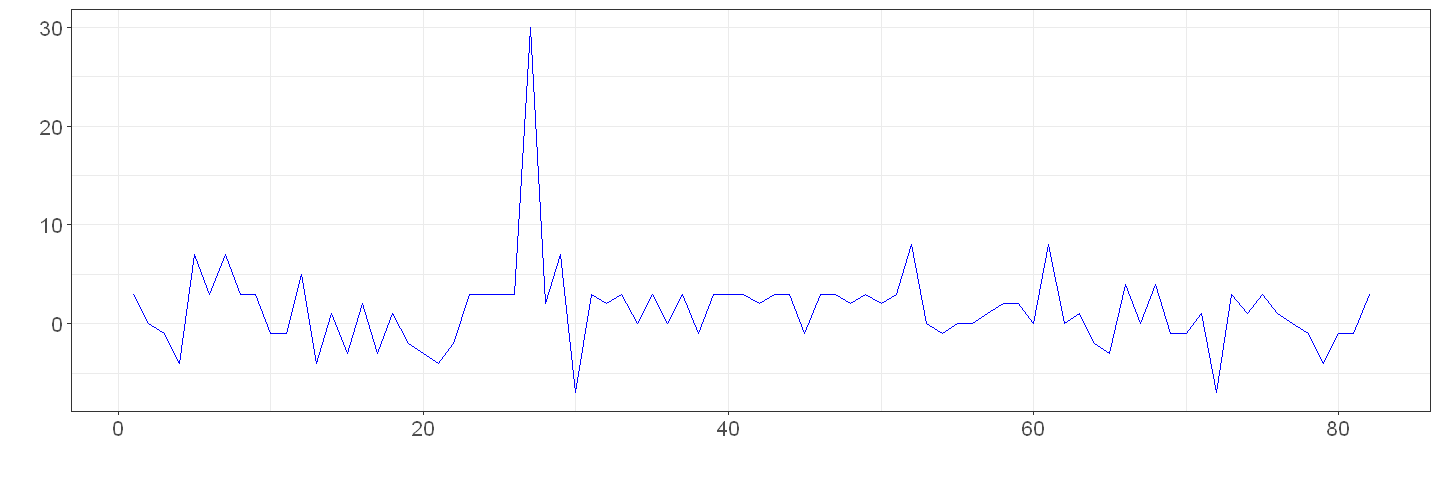

In [27]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

The point at  𝑡=27  with value 30 seems like an outlier; otherwise the series seems stationary.

**(b)**

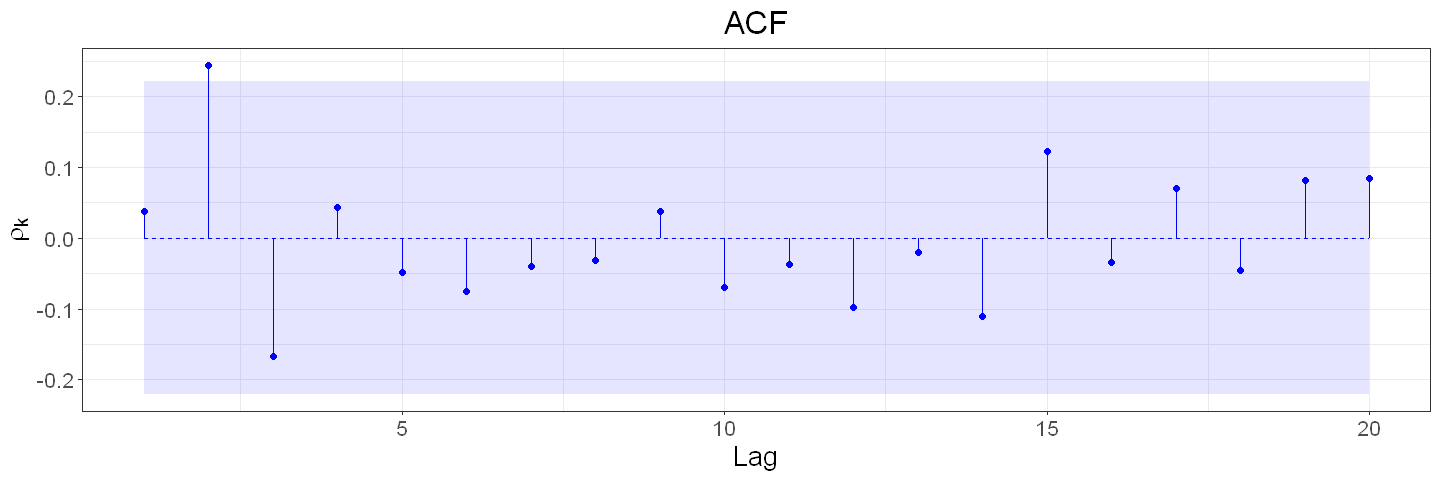

In [28]:
bound = 2 / sqrt(length(Y))
plot_acf_with_bounds(acf(Y, lag.max=20, plot=F)$acf[-1], bound, -bound, title='ACF')

It looks like there is a significant autocorrelation at lag 2.

**(c)**

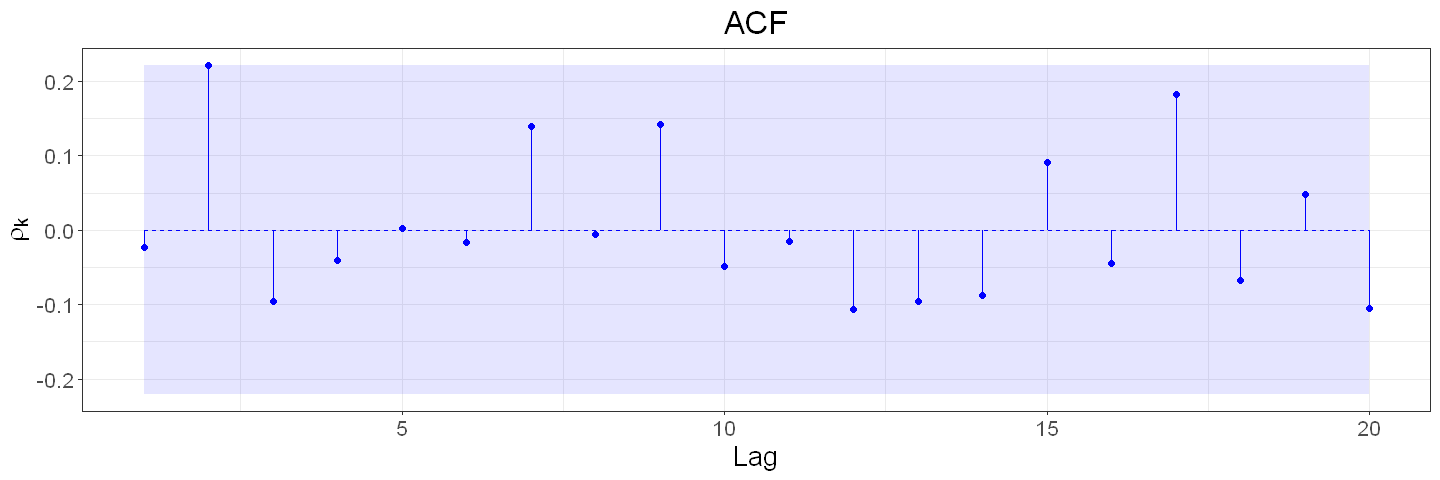

In [29]:
Y[27] = 1
plot_acf_with_bounds(acf(Y, lag.max=20, plot=F)$acf[-1], bound, -bound, title='ACF')

This doesn't seem to have had a large impact on the sample ACF for lag 2.

**(d)**

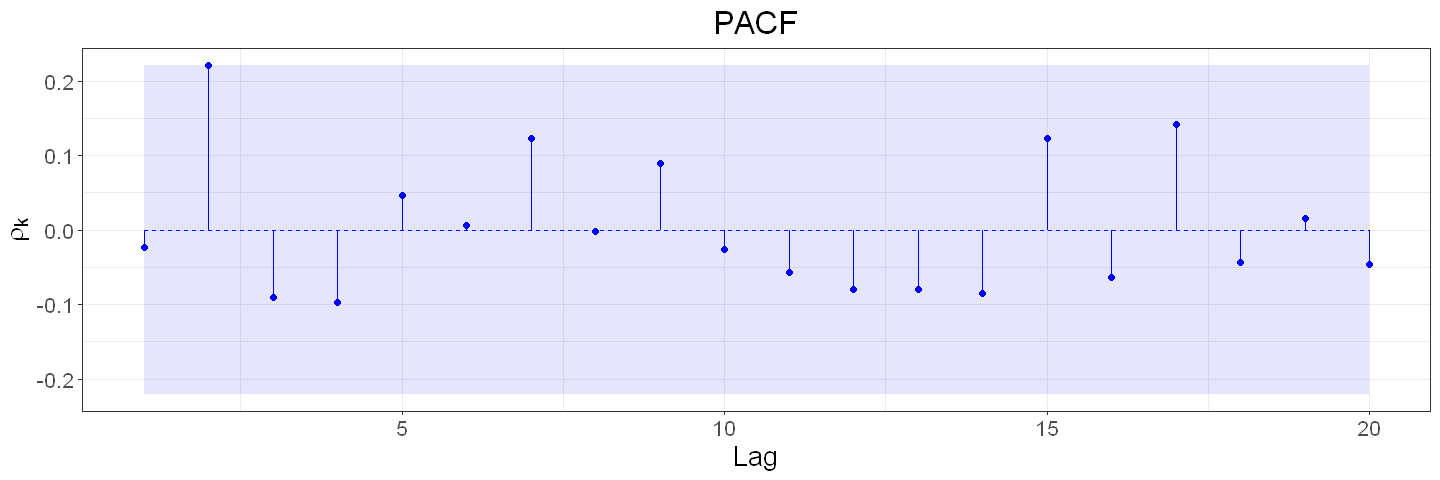

In [30]:
plot_acf_with_bounds(pacf(Y, lag.max=20, plot=F)$acf, bound, -bound, title='PACF')

This suggests an AR(2) model.

**Exercise 6.34**. The data file named `deere2` contains 102 consecutive values for the amount of deviation (in 0.0000025 inch units) from a specified target value that another industrial machining process produced at Deere & Co.

**(a)** Display the time series plot of this series and comment on its appearance. Would a stationary model seem to be appropriate?

**(b)** Display the sample ACF and PACF for this series and select tentative orders for an ARMA model for the series.

**Solution**.

In [31]:
Y <- read.table("../data/deere2.dat", header=TRUE)[['deere2']]

**(a)**

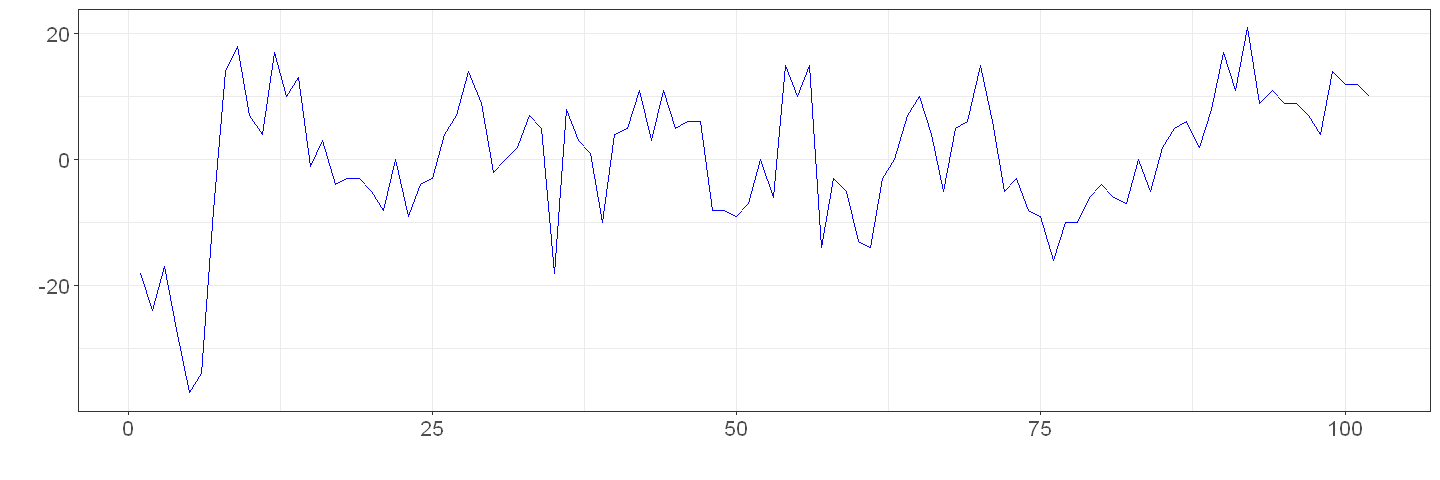

In [32]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

This series could be stationary. Let's do the ADF test to get a better sense:

In [33]:
adf.test(Y)

Warning message in adf.test(Y):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -4.9934, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


ADF rejects nonstationarity, agreeing with the intuition above.

**(b)**

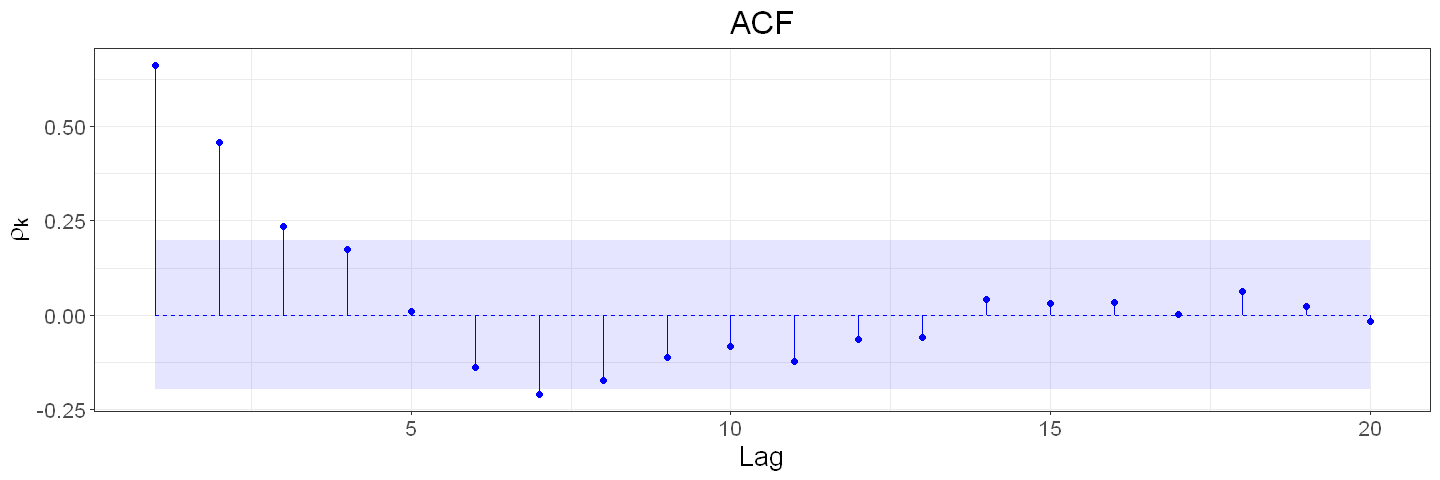

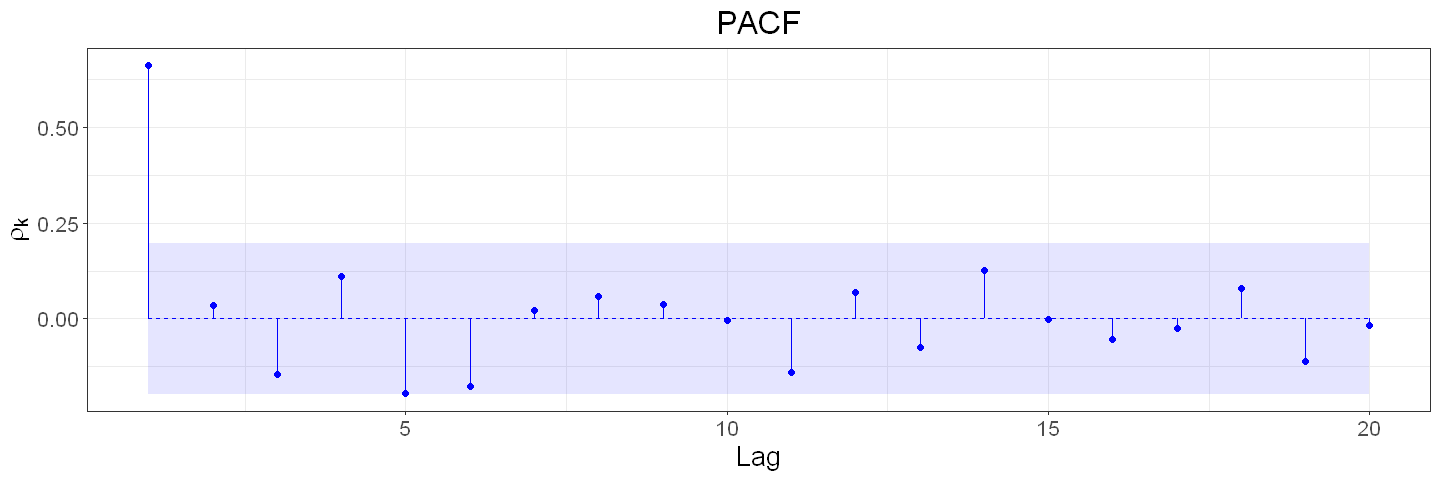

In [34]:
bound = 2 / sqrt(length(Y))
plot_acf_with_bounds(acf(Y, lag.max=20, plot=F)$acf[-1], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, lag.max=20, plot=F)$acf, bound, -bound, title='PACF')

PACF appears to suggest an AR(1) model.  Let's also look at EACF:

In [35]:
source('eacf.R')

In [36]:
eacf(Y, ar.max=13, ma.max=13)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10 11 12 13
0  x x x o o o x o o o o  o  o  o 
1  o o x o o o o o o o o  o  o  o 
2  x o o x o o o o o o o  o  o  o 
3  x o o x o o o o o o o  o  o  o 
4  x o x x o o o o o o o  o  o  o 
5  x x o o o o o o o o o  o  o  o 
6  o o x o o o o o o o o  o  o  o 
7  x o o o o o o o o o o  o  o  o 
8  x x o o o o o o o o o  o  o  o 
9  x o o o o o o o o o o  o  o  o 
10 o x x o o o o o o o o  o  o  o 
11 x o x o o o o o o o o  o  o  o 
12 x o x o x o o o o o o  o  o  o 
13 x x x x x o o o o o o  o  o  o 


EACF also appears to suggest an AR(1) model.

**Exercise 6.35**. The data file named deere3 contains 57 consecutive measurements recorded from a complex machine tool at Deere & Co. The values given are deviations from a target value in units of ten millionths of an inch. The process employs a control mechanism that resets some of the parameters of the machine tool depending on the magnitude of deviation from target of the last item produced.

**(a)** Display the time series plot of this series and comment on its appearance.  Would a stationary model be appropriate here?

**(b)** Display the sample ACF and PACF for this series and select tentative orders for an ARMA model for the series.

**Solution**.

In [37]:
Y <- read.table("../data/deere3.dat", header=TRUE)[['deere3']]

**(a)**

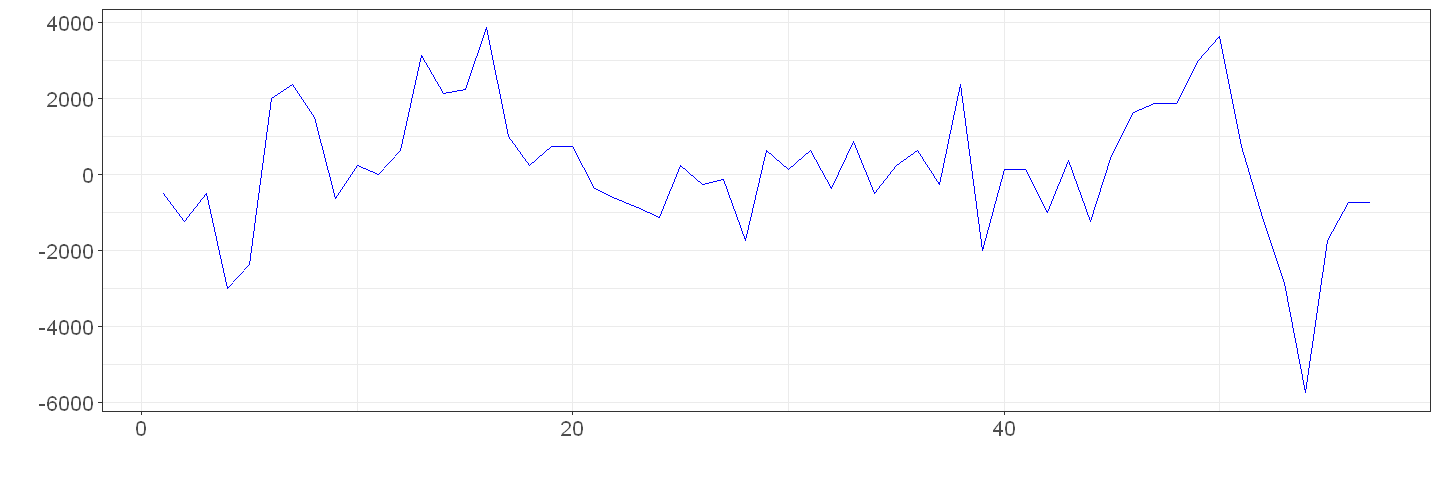

In [38]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

This series still seems to be stationary -- though the intuition is also partly driven by the fact that this is a process mediated by a control mechanism, rather than just plain measurement error. Let's look at the ADF test:

In [39]:
adf.test(Y)

Warning message in adf.test(Y):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -4.2521, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


The ADF test rejects nonstationarity.

**(b)**

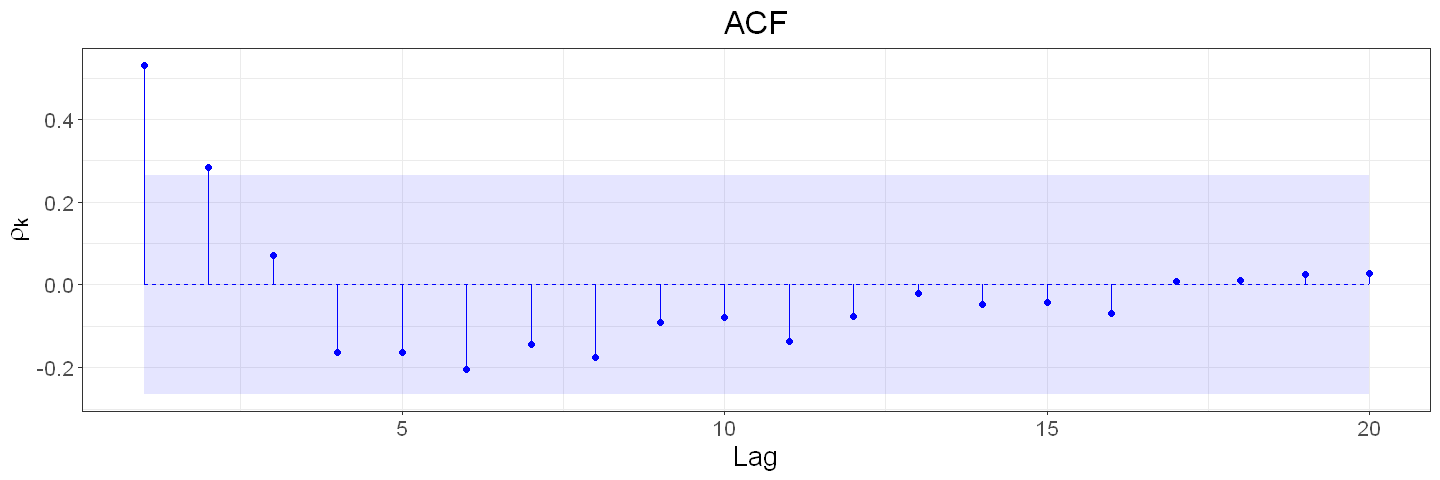

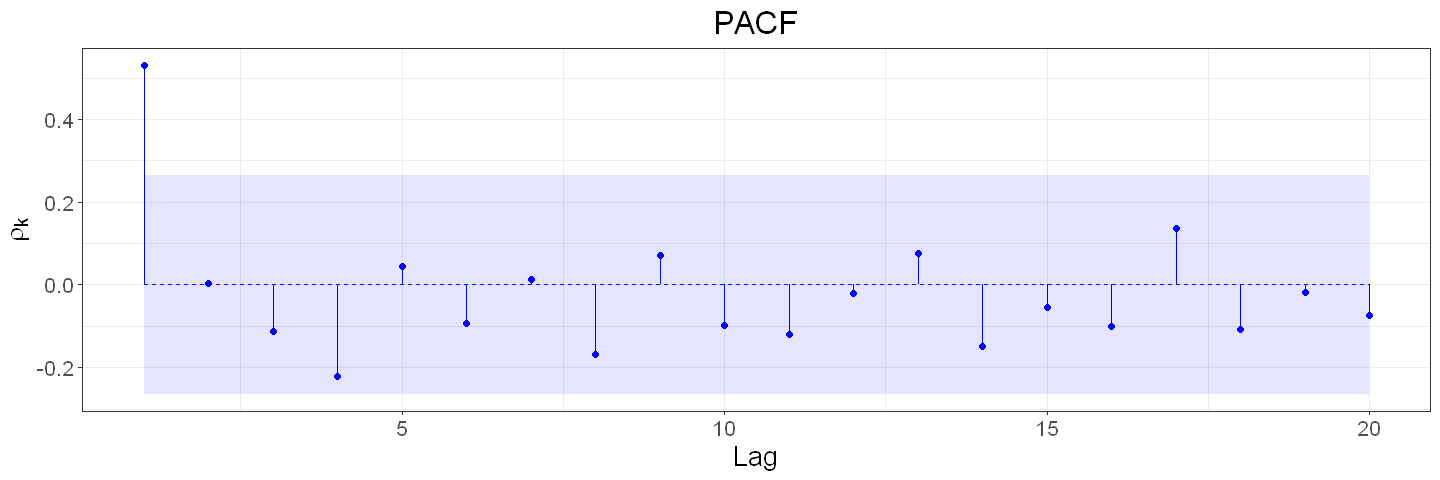

In [40]:
bound = 2 / sqrt(length(Y))
plot_acf_with_bounds(acf(Y, lag.max=20, plot=F)$acf[-1], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, lag.max=20, plot=F)$acf, bound, -bound, title='PACF')

Once again, an AR(1) model seems reasonable from the PACF. Let's also look at the EACF:

In [41]:
eacf(Y, ar.max=13, ma.max=13)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10 11 12 13
0  x x o o o o o o o o o  o  o  o 
1  o o o o o o o o o o o  o  o  o 
2  o o o o o o o o o o o  o  o  o 
3  x o o o o o o o o o o  o  o  o 
4  o x o o o o o o o o o  o  o  o 
5  o x o x o o o o o o o  o  o  o 
6  o x o x o o o o o o o  o  o  o 
7  o x x o o o o o o o o  o  o  o 
8  x o o o o o o o o o o  o  o  o 
9  x o x o o o o o o o o  o  o  o 
10 x x o o o o o o o o o  o  o  o 
11 o x o o o o o o o o o  o  o  o 
12 o o o o o o o o o o o  o  o  o 
13 x o o o o o o o o o o  o  o  o 


EACF also appears to suggest an AR(1) model.

**Exercise 6.36**. The data file named `robot` contains a time series obtained from an industrial robot.  The robot was put through a sequence of maneuvers, and the distance from a desired ending point was recorded in inches. This was repeated 324 times to form the time series.

**(a)** Display the time series plot of the data. Based on this information, do these data appear to come from a stationary or nonstationary process?

**(b)** Calculate and plot the sample ACF and PACF for these data. Based on this additional information, do these data appear to come from a stationary or nonstationary process?

**(c)** Calculate and interpret the sample EACF.

**(d)** Use the best subsets ARMA approach to specify a model for these data. Compare these results with what you discovered in parts (a), (b), and (c).

**Solution**.

In [42]:
Y <- read.table("../data/robot.dat", header=TRUE)[['robot']]

**(a)**

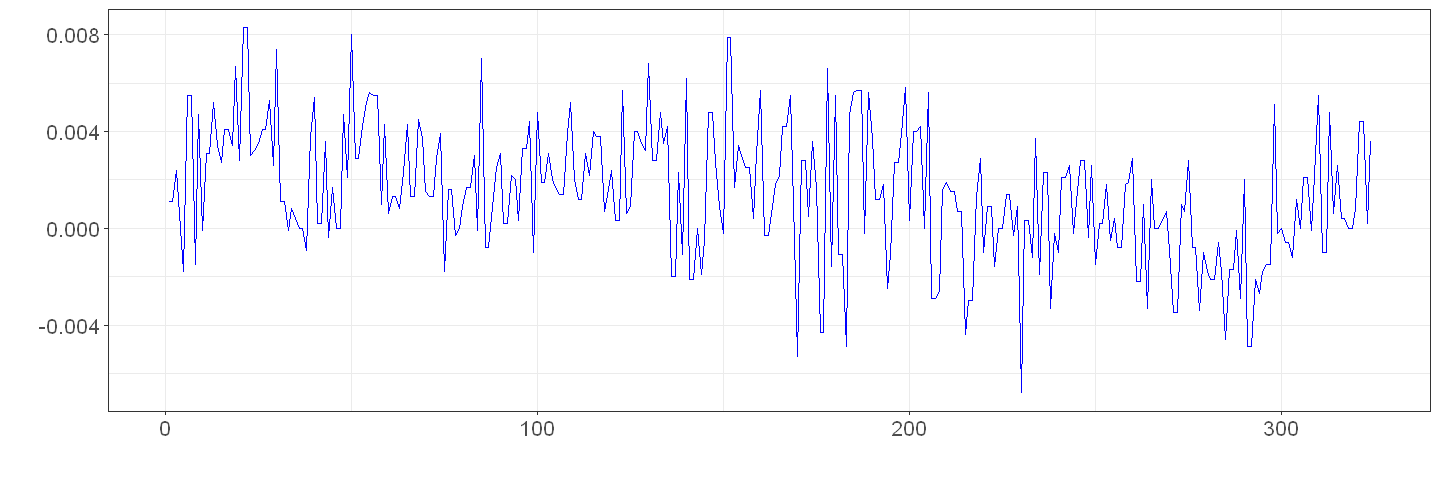

In [43]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

This series does appear stationary, though there is perhaps some "drift" in the later half.  Let's look at the ADF:

In [44]:
adf.test(Y)

Warning message in adf.test(Y):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -4.6522, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


ADF does test rejects nonstationarity.  Perhaps the series is stationary.

**(b)**

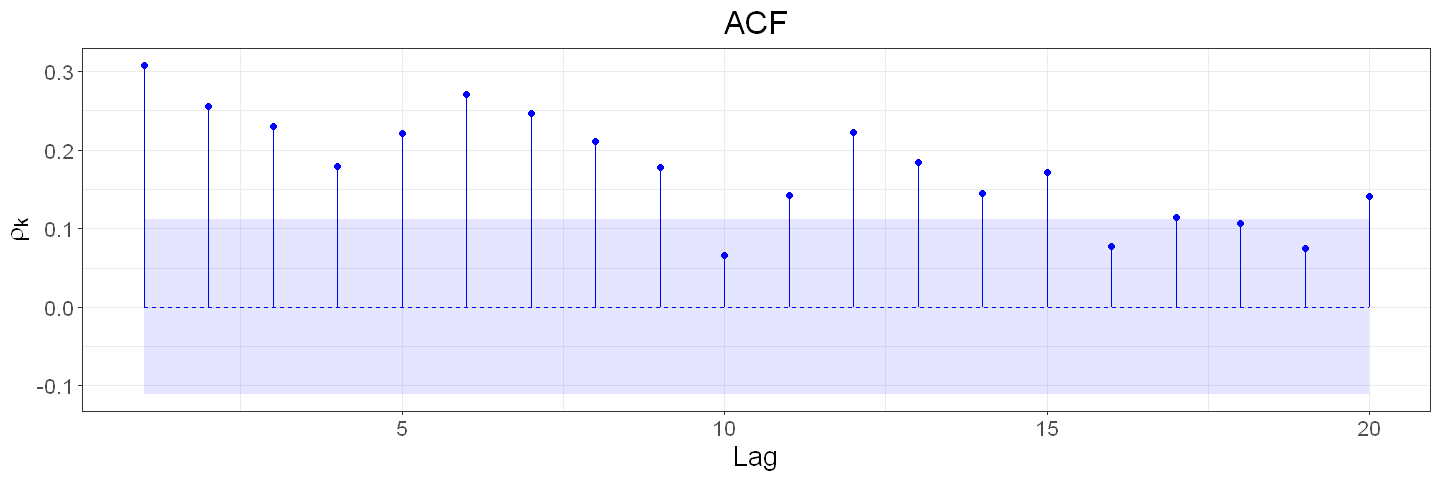

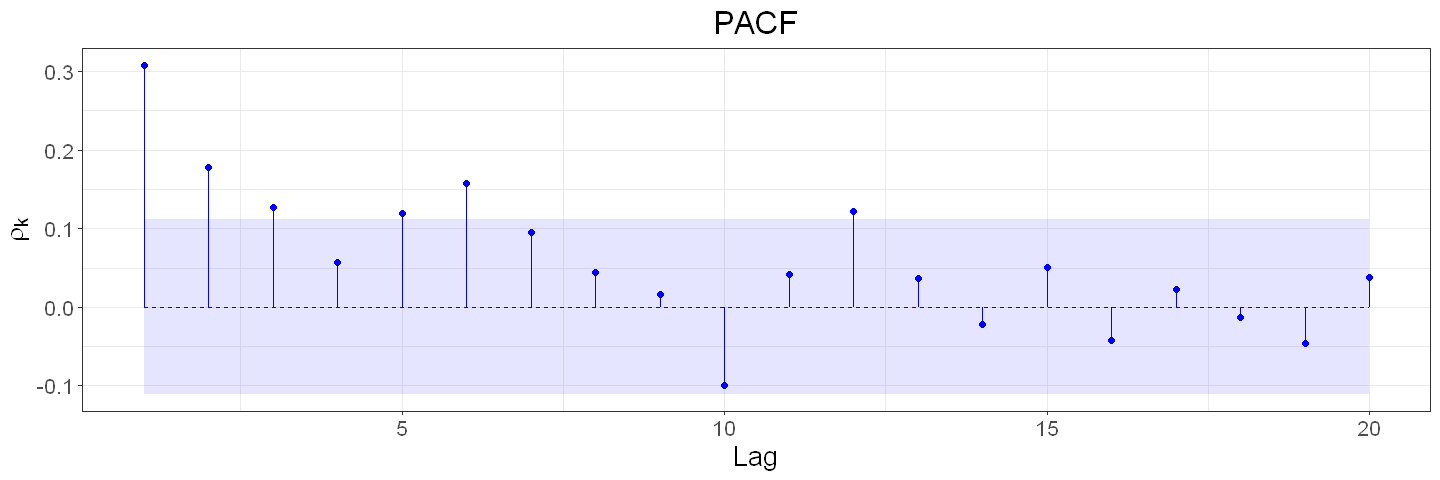

In [45]:
bound = 2 / sqrt(length(Y))
plot_acf_with_bounds(acf(Y, lag.max=20, plot=F)$acf[-1], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, lag.max=20, plot=F)$acf, bound, -bound, title='PACF')

The PACF plot suggests an AR(3) model for the series.

**(c)**

In [46]:
eacf(Y)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x o x  x  x  x 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x x x x o o o o o o o  o  x  o 
5 x x x o o o o o o o o  o  x  o 
6 x o o o o x o o o o o  o  o  o 
7 x o o x o x x o o o o  o  o  o 


The EACF suggests an ARMA(1, 1) process for the series.

**(d)**

In [47]:
source('armasubsets.R')

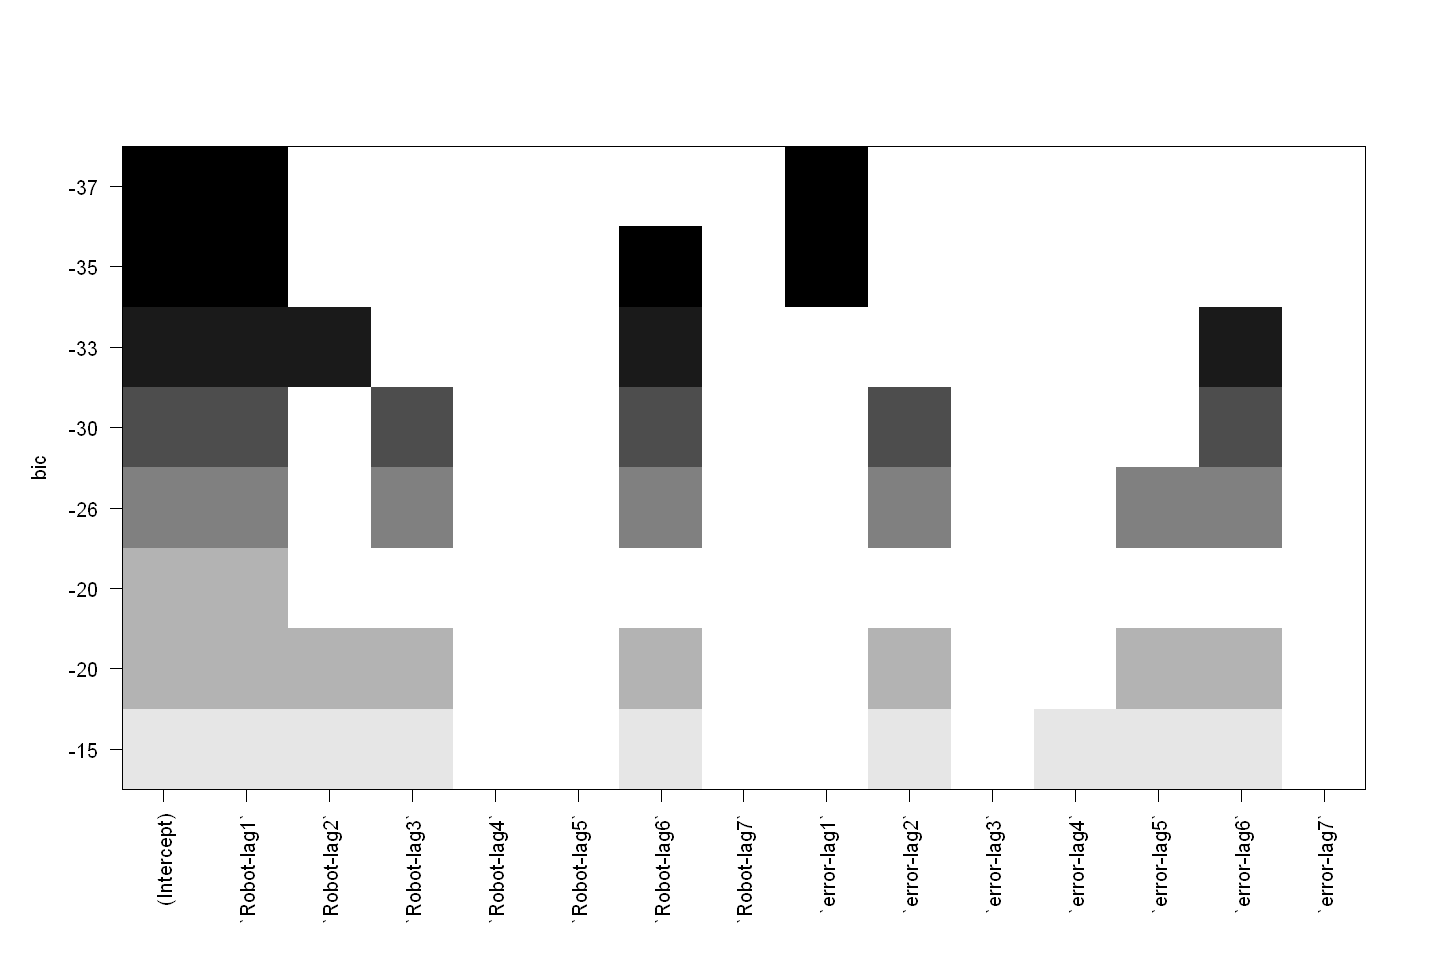

In [48]:
options(repr.plot.width=12, repr.plot.height=8)

plot(armasubsets(y=Y, nar=7, nma=7, y.name='Robot', ar.method='ols'))

The best subsets approach also suggests an ARMA(1, 1) model (looking at the darker cells in the topmost row / with best BIC).